# Fandango 2015 Movie Ratings: Legit or Bias?

![](Fandango.jpg)

## Introduction

This guided project ties in with an article ([here](https://fivethirtyeight.com/features/fandango-movies-ratings/ 'here'))  titled, 'Be Suspicious Of Online Movie Ratings Especially Fandango’s', written by Walt Kickey in 2015. You can access the data used for the article [here](https://github.com/fivethirtyeight/data/tree/master/fandango 'here'). Walt explains that he was prompted by a colleague to investigate the validity of Fandango's movie ratings. Walt gathered movie rating data on movies released in 2015 up to August 2015 from the following movie rating sources:

- Rotten Tomatoes Critics
- Rotten Tomatoes Users
- Metacritic Critics
- Metacritic Users
- IMDb Users
- Fandango

To improve uniformity of the raw data, Walt made a judgement call to focus primarily on movies that had 30 or more user reviews. These would be regarded as 'popular movies'. As Walt began to dig deeper in his analysis, he observed the following regarding **Fandango ratings**:

- none of the 209 popular movies had below a 3-star rating.
- seventy-eight percent had a rating of 4 stars or higher.
- when Fandango averages user ratings on its website, they never round the average down.
- there were times when Fandango’s rounding system added a half-star to the film’s rating.
- for the 209 popular movies, the average movie gained 0.25 stars from this rounding.

Walt generated a graph, comparing distribution curves for each of the six rating sources. The graph below shows the peak of the Fandango ratings at about 4.5 stars and a percentage of 38% of all of its 146 movie ratings.

![](Walt%20Graph2.jpg)

**<span style="color:blue">So, if there is purpose in the Fandango ratings being manipulated with a positive bias, what's in it for them? Simple: Fandango sells tickets directly to consumers. What better way to potentially increase ticket sales than by showing higher movie ratings.</span>**

When Walt brought his observations to light via his article and asked Fandango for explanation, their response basically was, “There appears to be a software glitch on our site with the rounding logic of our five star rating system, as it rounds up to the next highest half star instead of the nearest half star.”

In response to the exposure of their apparent flaw, Fandango stated that they planned to fix the rounding algorithm on its website “as soon as possible.”

In response to Walt's findings and Fandango's response, one of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on [GitHub](https://github.com/mircealex/Movie_ratings_2016_17 'GitHub'). With that available data, it looks like we have the opportunity to answer the following question;

**<span style="color:green">'Did Fandango carry out their commitment to correct their apparent movie rating flaws?'</span>**


## Project Objective

The objective of this project is to determine whether Fandango corrected their movie rating flaws.

I will do this by comparing the movie rating results from (2015) and from (2016) after their response; "We plan to fix the rounding algorithm on our website as soon as possible".

## Some Cautions to Note

### **<span style="color:blue">Happenstance Data Analysis</span>**

The data collected for this analysis was not generated for a statistical 'Design of Experiment'. This analysis reminds me more of 'Happenstance Data Analysis'. The data used in this project were merely collected 'after the fact'. Statisticians often refer to such data as "happenstance data." Because happenstance data aren't gathered under controlled conditions, they are subject to a wide variety of unknown influences that make their validity questionable. Therefore, happenstance data analysis should never be used to draw conclusions. However, this is an 'unofficial' analysis being performed more for personal coding learning and development. So, I will still continue with the data analysis.

### **<span style="color:blue">Kendall’s Coefficient of Concordance</span>**

Kendall’s coefficient of concordance (aka Kendall’s W) is a measure of agreement among raters. Kendall's W is a non-parametric statistic. It is a normalization of the statistic of the Friedman test, and can be used for assessing agreement among raters.

**So why bring this up here and now?** I realize we don't have data that would enable me to measure concordance of agreement between rater groups (Rotten Tomatoes, Metacritic ...) but I just want to at least provide some reasoning for large differences in movie rating distributions shown in the graph further above among all the rater groups. I believe that Rotten Tomatoes critics have a different standard they follow for movie rating (acting, plot, script, cinematography, ...) than especially movie goers. For example, there are times when I have chosen to watch a movie even though it was rated say under 20 by Rotten Tomatoes critics, and yet I thoroughly enjoyed the movie. In other cases, I have watched movies that were highly rated, say above 90, by Rotten Tomatoes critics and I did not enjoy the movies at all.

### **<span style="color:blue">Pre-Test Post-Test Control Group Study</span>**

This analysis reminds me of a type of study that could have been designed if there was opportunity right from the start to do so: Pre-Test Post-Test Control Group Study. Is that even important to discuss? Well yes, for the following reason.

**<span style="color:red">It is possible to come up with the right conclusion for this analysis but for the wrong reason.</span>**

**HOW?** If we observe a significant decrease in Fandango ratings after 2015, it may not be because Fandango changed their rating system. It's possible that the movies in 2016 and 2017 were in fact much worse than they were in 2015. It's possible that the change in movie quality could be a confounding variable in this analysis and make us think that Fandango actually took appropriate action when in fact they didn't.

This type of before and after assessment should theoretically have a 'control group' with no 'treatment' to confirm that it wasn't the quality of movies that changed. Both groups are measured before and after the experimental group is exposed to a treatment to preventing confounding. A control group provides a baseline measurement for the experiment.

The 'treatment' on the Fandango rating group is, 'Fandango correcting their rating system', if they in fact did so. We are assuming that they did. The 'before' treatment data is taken from 2015 and the 'after' treatment data is taken from 2016.

### **<span style="color:blue">My Approach</span>**
I will **attempt** to find a 'control group' among the five group of raters to eliminate any possible confounding variables. I decided to choose Rotten Tomatoes Critics as the potential control group based on the following assumptions:

1. I assume that the same critics were involved in rating movies in 2015 and 2016.
2. I assume that they used the same movie rating standards in 2015 and 2016.

I'm assuming then that the Rotten Tomatoes Critic group received no 'treatment' and therefore can be classed as a 'control group'. I will test this later in this report.

### Import 2015 Data File - Make Observations

In [1]:
# import relevant python libraries.
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
from IPython.display import HTML
from IPython.display import display, Markdown

r_15 = pd.read_csv('fandango_score_comparison.csv')
print(r_15.info(), '\n')
print(r_15.head(3), '\n')

# make sure qty. of ratings was at least 30 per movie.
display(Markdown('<h3><span style="color:blue"> Number of Ratings Per Movie </span></h3>'))
print('Lowest number of ratings per movie =', r_15['Fandango_votes'].min(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

<h3><span style="color:blue"> Number of Ratings Per Movie </span></h3>

Lowest number of ratings per movie = 35 



### Continue Organizing 2015 Data File

In [2]:
# split movie name and release year so that data file
# can be modified to limit release year to 2015.
r_15[['movie','year']] = r_15.FILM.str.split('(', n=1, expand=True,)
r_15['year'] = r_15['year'].str.replace(')', '')

# convert year from object to integer
# and select data for only year 2015.
r_15['year'] = r_15['year'].astype(int)
r_15_only = r_15[r_15['year'] == 2015]
display(Markdown('<h3><span style="color:blue"> Number of Ratings for 2015 </span></h3>'))
print(r_15_only['year'].value_counts(), '\n')

# create DataFrame from original with only Fandango related columns for 2015.
dango_15 = r_15_only[['movie', 'year', 'Fandango_Stars',
                      'Fandango_Ratingvalue', 'Fandango_votes',
                      'Fandango_Difference']]
print(dango_15.head(3))

<h3><span style="color:blue"> Number of Ratings for 2015 </span></h3>

2015    129
Name: year, dtype: int64 

                      movie  year  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron   2015             5.0                   4.5   
1               Cinderella   2015             5.0                   4.5   
2                  Ant-Man   2015             5.0                   4.5   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  


### Import 2016 Data File

In [3]:
r_16_17 = pd.read_csv('movie_ratings_16_17.csv')
print(r_16_17.info(), '\n')
print(r_16_17.head(), '\n')

# create DataFrame from original with
# only Fandango related columns for 2016, and 2017.
dango_16_17 = r_16_17[['movie', 'year', 'fandango']]
print(dango_16_17.head(), '\n')

# create DataFrame from original for only 2016.
dango_16 = dango_16_17[dango_16_17['year'] == 2016]
print(dango_16['year'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB
None 

                     movie  year  metascore  imdb  tmeter  audience  fandango  \
0      10 Cl

## Observations - 2015 & 2016 Data Files

The file _'fandango_score_comparison.csv'_ contains every film from part of 2015 that has Rotten Tomatoes ratings, RT User ratings, Metacritic scores, Metacritic User scores, IMDb scores, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015. I believe the sampling of these movies is truly not random.

The file _'movie_ratings_16_17.csv'_ contains movie ratings data for 214 of the most popular movies released in 2016 and 2017.

Since we are told that the selection of movies from 2016 and 2017 were the 'most popular movies', I would say that doesn't represent a true random sample selected from the total population available. We are not provided the number of Fandango viewer raters for each movie. All that we can do is assume that the selection of most popular movies implies viewer rater sample size is no less than 30 per movie. 

## Plot the Two KDE Distributions of Fandango Movie Ratings: 2015 vs. 2016


In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

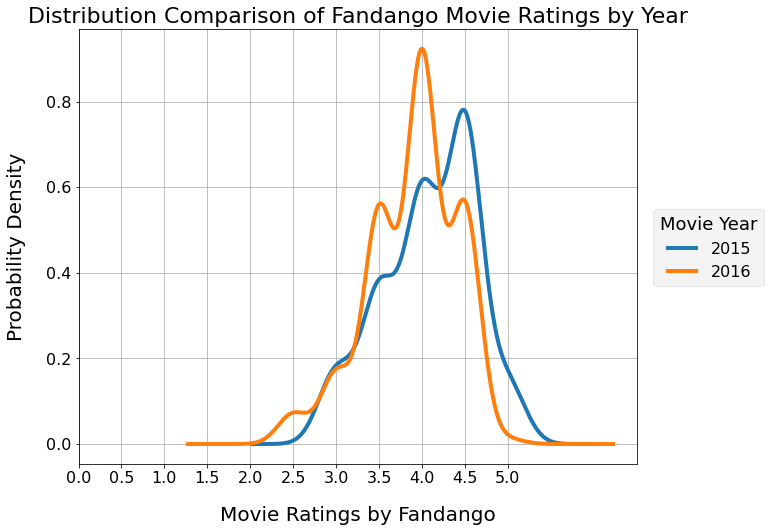

In [4]:
# plot kde type distributions using Pandas/Matlibplot.
fig, ax = plt.subplots(figsize=(10,8))
plt.style.use('fivethirtyeight')
values = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
dango_15['Fandango_Stars'].plot.kde()
dango_16['fandango'].plot.kde()
leg = fig.legend(labels=['2015','2016'], bbox_to_anchor=(1, .5),
           loc='center', borderaxespad=0, fontsize=16)
leg.set_title('Movie Year',prop={'size':18})
plt.xticks(values)
ax.tick_params(labelsize=16)
plt.title('Distribution Comparison of Fandango Movie Ratings by Year', fontsize=22)
plt.xlabel('Movie Ratings by Fandango', fontsize=20, labelpad = 20) 
plt.ylabel('Probability Density', fontsize=20, labelpad = 20)
plt.show()


## Alternative KDE Plot

Here is an alternative way to plot the KDE distributions with 'color fill', by using Seaborn plotting code if we want to enhance visualization in that way.

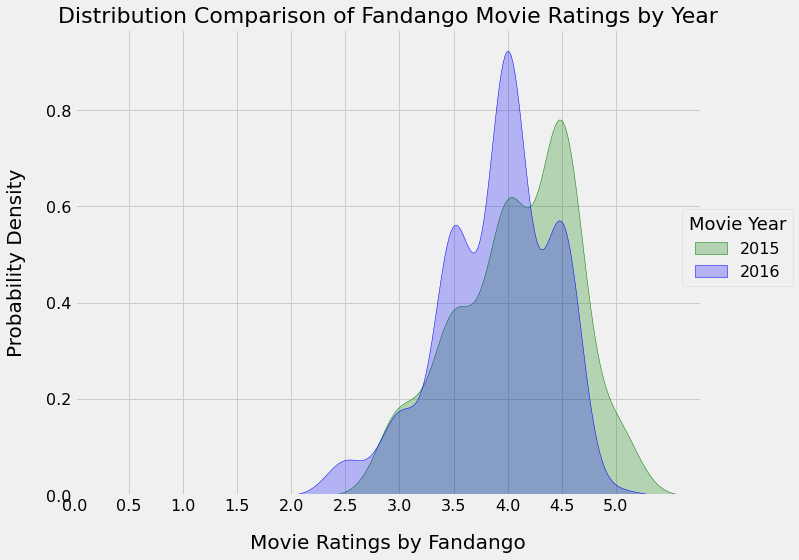

In [5]:
# plot kde type distributions using Seaborn.
fig, ax = plt.subplots(figsize=(10,8))
plt.style.use('fivethirtyeight')
values = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
x=dango_15['Fandango_Stars']
y=dango_16['fandango']
sns.kdeplot(x, color='green', shade=True, legend=True)
sns.kdeplot(y, color='blue', shade=True, legend=True)
leg = fig.legend(labels=['2015','2016'], bbox_to_anchor=(1, .5),
           loc='center', borderaxespad=0, fontsize=16)
leg.set_title('Movie Year',prop={'size':18})
plt.xticks(values)
ax.tick_params(labelsize=16)
plt.title('Distribution Comparison of Fandango Movie Ratings by Year', fontsize=22)
plt.xlabel('Movie Ratings by Fandango', fontsize=20, labelpad = 20) 
plt.ylabel('Probability Density', fontsize=20, labelpad = 20)
plt.show()

## Observations

Whichever way we plot these distributions, it does appear that the 2016 distribution of ratings has shifted slightly to the left relative to the 2015 ratings, which implies an overall reduction in rating values. This is suggesting that Fandango did take appropriate action regarding their movie rating system. However, no conclusions just yet. We haven't statistically verified it or eliminated any confounding variables which will follow later in this report.

There also appears to be a significant change in distribution shape as well. The 2015 distribution has a 'left-skewed' shape which means most of the ratings are at the high end. The 2016 distribution shape looks a lot more symmetrical with its primary mode (peak) about 0.5 lower than the 2015 primary mode.


## Box and Whisker Plot

Besides comparing Fandango movie rating distributions for 2015 and 2016 via the KDE plots, I would like to include a Box and Whisker plot. 

Personally, I like to get as many different views of distributions that I can, similar to umpires when they review a 'safe' or 'out' call at first base by looking at the play from many different camera angles to facilitate making the 'right' call.

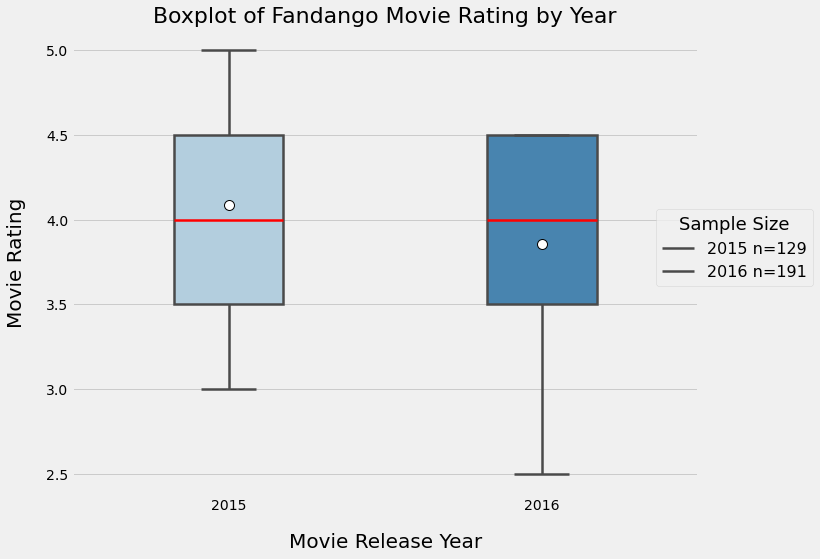

In [6]:
# create a dataframe containing only the two years of Fandango ratings.
df = pd.DataFrame(columns = ['2015', '2016'])
df['2015'] = dango_15['Fandango_Stars']
df['2016'] = dango_16['fandango']

# use Seaborn coding to generate box and whisker plot. 
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, width = 0.35, linewidth=2.5, palette='Blues',
            showmeans=True, medianprops={'color':'red'}, meanprops={'marker':'o',
            'markerfacecolor':'white', 'markeredgecolor':'black',
            'markersize':'10'})
leg = fig.legend(labels=['2015 n=129','2016 n=191'], bbox_to_anchor=(1, .5),
           loc='center', borderaxespad=0, fontsize=16)
leg.set_title('Sample Size',prop={'size':18})
plt.title('Boxplot of Fandango Movie Rating by Year', fontsize=22)
plt.xlabel('Movie Release Year', fontsize=20, labelpad = 20) 
plt.ylabel('Movie Rating', fontsize=20, labelpad = 20)
plt.show()

## Observations

- The median for each year (red line) is the same: 4.0.
- The means (white dots) are slightly different. I will calculate those later.
- The range that 50% of all ratings fall within is the same: 3.5 to 4.5.
- 25% of the 2015 ratings are above 4.5, while there are none for 2016
(technically there is one at 5.0, but is perhaps rounded to 0).
- 25% of the 2015 ratings are below 3.5, as low as 3.0 while 25% of
the 2016 ratings are below 3.5, as low as 2.5.


## Calculate Descriptive Statistics

In [7]:
mean_2015 = round(dango_15['Fandango_Stars'].mean(), 2)
median_2015 = dango_15['Fandango_Stars'].median()
mode_2015 = dango_15['Fandango_Stars'].mode().iloc[0]
print('Mean of 2015 data =', mean_2015, '\n')
print('Median of 2015 data =', median_2015, '\n')
print('Primary Mode of 2015 data =', mode_2015, '\n')

mean_2016 = round(dango_16['fandango'].mean(), 2)
median_2016 = dango_16['fandango'].median()
mode_2016 = dango_16['fandango'].mode().iloc[0]
print('Mean of 2016 data =', mean_2016, '\n')
print('Median of 2016 data =', median_2016, '\n')
print('Primary Mode of 2016 data =', mode_2016, '\n')


Mean of 2015 data = 4.09 

Median of 2015 data = 4.0 

Primary Mode of 2015 data = 4.5 

Mean of 2016 data = 3.89 

Median of 2016 data = 4.0 

Primary Mode of 2016 data = 4.0 



## Plot Descriptive Statistics

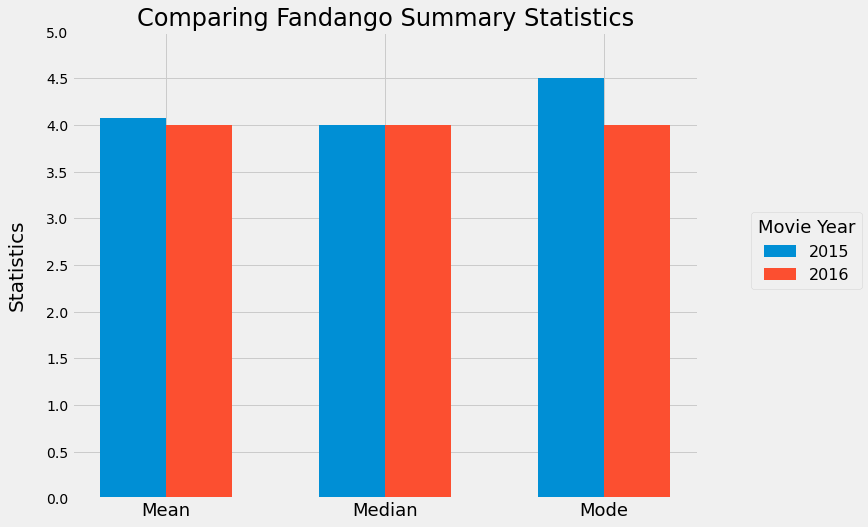

In [8]:
# create input data.
labels = ['Mean', 'Median', 'Mode']
r_15_stat = [4.08, 4.0, 4.5]
r_16_stat = [4.0, 4.0, 4.0]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x - width/2, r_15_stat, width, label='2015')
rects2 = ax.bar(x + width/2, r_16_stat, width, label='2016')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Statistics', fontsize=20, labelpad=20)
ax.set_title('Comparing Fandango Summary Statistics', fontsize=24)
ax.set_xticks(x)
plt.yticks(np.linspace(0, 5, 11))
ax.set_xticklabels(labels, fontsize=18)
leg = fig.legend(labels=['2015','2016'], bbox_to_anchor=(1.1, .5),
           loc='center', borderaxespad=0, fontsize=16)
leg.set_title('Movie Year',prop={'size':18})

plt.show()

## Observations

- Magnitudinally, there is very little difference in means.
- There's no difference in medians.
- Primary mode for 2016 has the greatest magnitude of from 2015: 0.5 units.

Now we're ready to test whether there has been a significant shift in movie ratings from 2015 to 2016.

## Mann-Whitney U Test

We can perform an appropriate hypothesis test to statistically confirm our suspicion at this point about significant shift in Fandango ratings from 2015 to 2016.

Since the data is not classified as continuous but rather is ordinal, the appropriate hypothesis test to use here is the Mann Whitney U test, sometimes called the Mann Whitney Wilcoxon Test or the Wilcoxon Rank Sum Test. It is used to test whether two samples are likely to derive from the same population (i.e., that the two populations have the same shape). The Mann-Whitney test works fine with unequal sample sizes. Unfortunately, this test doesn't test for significant difference in mean or median or mode, but tests for 'equality' of shape.

In [9]:
# Coding for Mann-Whitney U Test
from scipy.stats import mannwhitneyu
data1 = dango_15['Fandango_Stars']
data2 = dango_16['fandango']
stat, p = mannwhitneyu(data1, data2)
print('stat=%.2f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=9767.50, p=0.001
Probably different distributions


## Observations

With a p-value of 0.001, there is sufficient statistical evidence to infer that the two sample distributions from 2015 and 2016 do not come from the same population. The shape changed from 'left-skewed' to more symmetrical. The primary mode of 2016 shifted down by 0.5. That is mainly because of the shape change from 'left-skewed' to symmetrical because many of the high ratings dropped which in turn reduced the mode and mean.

So, we can say with a reasonably high degree of confidence that the Fandango 2016 ratings dropped. But we cannot yet conclude that it is based upon Fandango's correction of their movie rating system. 

I will now attempt to simulate having a 'control group' in order to remove any possible confounding variables and be able to conclude that Fandango took appropriate corrective action.

#  <span style="color:red">Control Group - Rotten Tomatoes Critics</span>

I'm following the same procedures as above to test for significant change in Rotten Tomatoes Critic ratings from 2015 to 2016. I'm using the original Rotten Tomatoes Critics rating scale of 0-100 rather than converting to 0-5. Reducing the scale of rating values to 0-5, would reduce the sensitivity of the data which I do not want to do.

In [10]:
rt_15 = r_15_only[['movie', 'year', 'RottenTomatoes']]
print(rt_15.head(3), '\n')
print(rt_15.info(), '\n')

r_16 = r_16_17[r_16_17['year'] == 2016]
print(r_16.head(3), '\n')
print(r_16['fandango'].value_counts(), '\n')

rt_16 = r_16[['movie', 'year', 'tmeter']]
print(rt_16.head(3), '\n')
print(rt_16.info(), '\n')

                      movie  year  RottenTomatoes
0  Avengers: Age of Ultron   2015              74
1               Cinderella   2015              85
2                  Ant-Man   2015              80 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 145
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   movie           129 non-null    object
 1   year            129 non-null    int32 
 2   RottenTomatoes  129 non-null    int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 3.5+ KB
None 

                 movie  year  metascore  imdb  tmeter  audience  fandango  \
0  10 Cloverfield Lane  2016         76   7.2      90        79       3.5   
1             13 Hours  2016         48   7.3      50        83       4.5   
2  A Cure for Wellness  2016         47   6.6      40        47       3.0   

   n_metascore  n_imdb  n_tmeter  n_audience  nr_metascore  nr_imdb  \
0         3.80    3.60     

## Plot the Two KDE Distributions of Rotten Tomatoes Movie Critic Ratings: 2015 vs. 2016

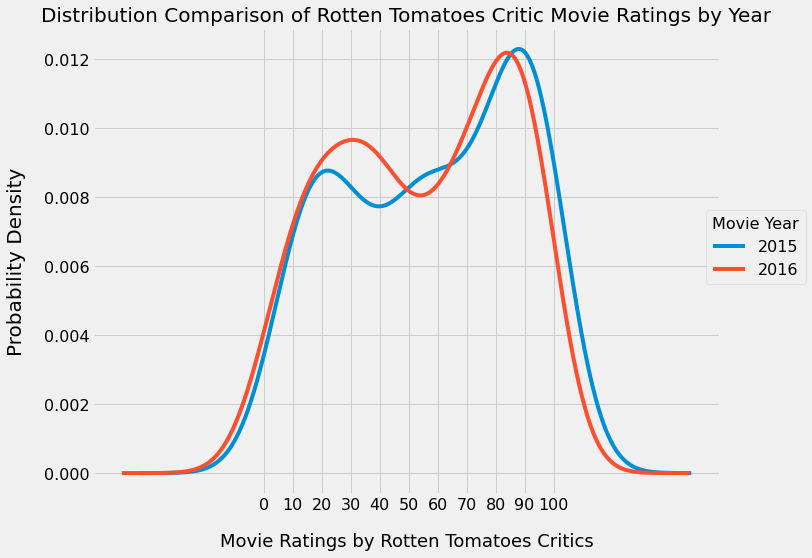

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
plt.style.use('fivethirtyeight')
values = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
rt_15['RottenTomatoes'].plot.kde()
rt_16['tmeter'].plot.kde()
leg = fig.legend(labels=['2015','2016'], bbox_to_anchor=(1, .5),
           loc='center', borderaxespad=0, fontsize=16)
leg.set_title('Movie Year',prop={'size':16})
plt.xticks(values)
ax.tick_params(labelsize=16)
plt.title('Distribution Comparison of Rotten Tomatoes Critic Movie Ratings by Year', fontsize=20)
plt.xlabel('Movie Ratings by Rotten Tomatoes Critics', fontsize=18, labelpad = 20) 
plt.ylabel('Probability Density', fontsize=20, labelpad = 18)
plt.show()

## Observations

It appears the two KDE distributions are very close in shape as well as location.

## Box & Whisker Plot

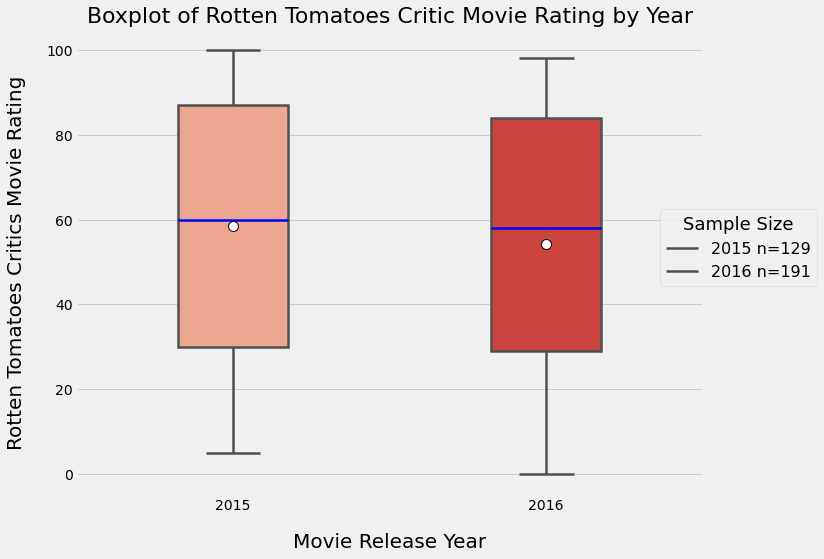

In [12]:
df2 = pd.DataFrame(columns = ['2015', '2016'])
df2['2015'] = rt_15['RottenTomatoes']
df2['2016'] = rt_16['tmeter']

fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df2, width = 0.35, linewidth=2.5, palette='Reds',
            showmeans=True, medianprops={'color':'blue'}, meanprops={'marker':'o',
            'markerfacecolor':'white', 'markeredgecolor':'black',
            'markersize':'10'})
leg = fig.legend(labels=['2015 n=129','2016 n=191'], bbox_to_anchor=(1, .5),
           loc='center', borderaxespad=0, fontsize=16)
leg.set_title('Sample Size',prop={'size':18})
plt.title('Boxplot of Rotten Tomatoes Critic Movie Rating by Year', fontsize=22)
plt.xlabel('Movie Release Year', fontsize=20, labelpad = 20) 
plt.ylabel('Rotten Tomatoes Critics Movie Rating', fontsize=20, labelpad = 20)
plt.show()

## Observations

There's a very slight downward shift in the 2016 box and whisker plot compared to the 2015 one, slightly affecting the mean but not the median.

## Calculate Descriptive Statistics

In [13]:
mean_rt_2015 = round(rt_15['RottenTomatoes'].mean(), 2)
median_rt_2015 = rt_15['RottenTomatoes'].median()
mode_rt_2015 = rt_15['RottenTomatoes'].mode().iloc[3]
print('Mean of 2015 data =', mean_rt_2015, '\n')
print('Median of 2015 data =', median_rt_2015, '\n')
print('Primary Mode of 2015 data =', mode_rt_2015, '\n')

mean_rt_2016 = round(rt_16['tmeter'].mean(), 2)
median_rt_2016 = rt_16['tmeter'].median()
mode_rt_2016 = rt_16['tmeter'].mode().iloc[0]
print('Mean of 2016 data =', mean_rt_2016, '\n')
print('Median of 2016 data =', median_rt_2016, '\n')
print('Primary Mode of 2016 data =', mode_rt_2016, '\n')


Mean of 2015 data = 58.4 

Median of 2015 data = 60.0 

Primary Mode of 2015 data = 92 

Mean of 2016 data = 54.37 

Median of 2016 data = 57.0 

Primary Mode of 2016 data = 84 



## Plot Descriptive Statistics

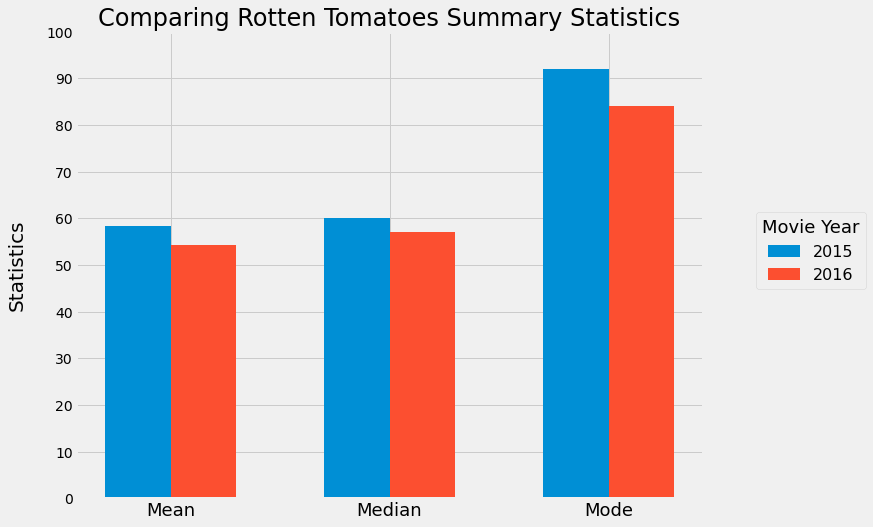

In [14]:
# create input data.
labels = ['Mean', 'Median', 'Mode']
rt_2015_stat = [58.40, 60.0, 92.0]
rt_2016_stat = [54.36, 57.0, 84.0]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x - width/2, rt_2015_stat, width, label='2015')
rects2 = ax.bar(x + width/2, rt_2016_stat, width, label='2016')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Statistics', fontsize=20, labelpad=20)
ax.set_title('Comparing Rotten Tomatoes Summary Statistics', fontsize=24)
ax.set_xticks(x)
plt.yticks(np.linspace(0, 100, 11))
ax.set_xticklabels(labels, fontsize=18)
leg = fig.legend(labels=['2015','2016'], bbox_to_anchor=(1.1, .5),
           loc='center', borderaxespad=0, fontsize=16)
leg.set_title('Movie Year',prop={'size':18})

plt.show()

## Observations

All three statistics; mean, median and mode are slightly lower for 2016 than 2015.

**Now to perform the Mann-Whitney U Test on the 'control group'.**

In [15]:
# Coding for Mann-Whitney U Test
from scipy.stats import mannwhitneyu
data1 = rt_15['RottenTomatoes']
data2 = rt_16['tmeter']
stat, p = mannwhitneyu(data1, data2)
print('stat=%.1f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=11279.5, p=0.100
Probably the same distribution


## Observations

Having chosen an alpha risk value of 0.05 (5%) and seeing a calculated p-value = 0.100, we can conclude with a reasonable level of confidence that the Rotten Tomatoes Critic group is a valid 'control group'.

This means that we can conclude with a reasonable level of confidence that Fandango made some 'improvements' to their movie rating system in attempt to remove any suspicion of tainted data.

# Conclusions

So I conclude that Fandango did take action to improve their movie rating system to prevent any data distortion. It would be interesting to know if the improvement in data authenticity had any effect on movie ticket sales by Fandango - positive or negative. Unfortunately I don't have the data to figure that out.

Now, after doing this enjoyable data analysis project, I have to say **<span style="color:red">the findings are irrelevant to the 'here and now'</span>** in this regard: in February 2016, Rotten Tomatoes and its parent site Flixster **were acquired** by **Fandango** (which is owned by Comcast). Warner Bros. retains a minority stake in the merged entities, including Fandango. I logged onto the current Fandango website and noticed that they no longer show their own movie rating results, but rather reveal the Rotten Tomatoes Critic and Audience Score results as shown in the example below. So, I guess Fandango no longer has opportunity to be 'slammed', at least for movie rating data.

May all your statistics be significant and important!

![](RT1.jpg)

![](RT2.jpg)